In [10]:
import pandas as pd

data=pd.read_csv('q2_moloco.csv')



The data contains 300 rows and 3 columns (from the left, A, B, and C). Please build a good regression model which explains column C by a function of  A and B. 

Note: Please do not use any ML libraries or packages. You can simply attach plot of data points and your regression model that fits the data points and of course, code point (preferably Github).

In [29]:
data.isnull().values.any()


False

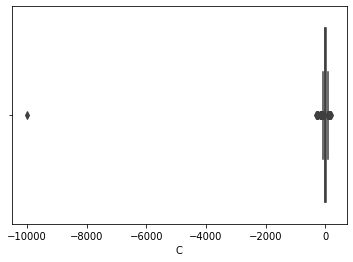

In [30]:
import seaborn as sns
sns.boxplot(=data.C)

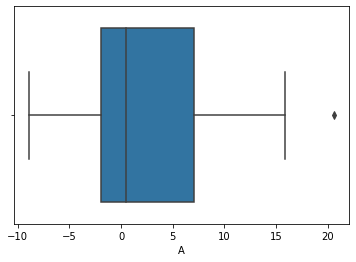

In [31]:
import seaborn as sns
sns.boxplot(x=data.A)

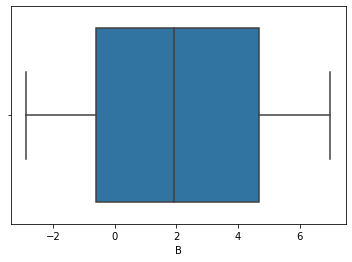

In [32]:
import seaborn as sns
sns.boxplot(x=data.B)

Outlier to be removed

In [33]:
data = data[data.C != data.C.min()]


Text(0.5, 0, 'C ')

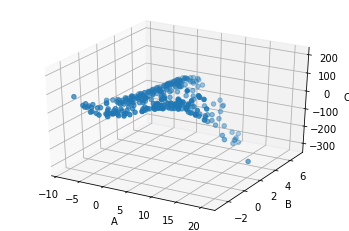

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X=data[['A','B']].values
y=data.C.values

# graph the data
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C ')

We clearly see non linearity in the data so we need to implement a linear basis function model.
The technique of a linear basis function model does allow us to still use linear regression techniques, to fit nonlinear data. As a result, we will be able to fit the data using different degrees of polynomials, e.g. a degree two polynomial (which is a linear combination of 1, x and x2), or a degree three polynomial (which is a linear combination of 1, x, x2 and x3), etc.. Higher degree polynomials are more expensive to compute and to fit, but can capture finer details in the data, that is are resulting in more expressive models.

Also we dont need to implement any optimization algorithm to estimate the least square solution as the dataset is relatively small and we can directly use normal equations

To measure the fit of our model, we will use a cost function called the Root-Mean-Square-Error (RMSE). It is related to MSE as follows:
RMSE(w) := sqrt(2 · MSE(w))
The magnitude of MSE can be difficult to interpret since it involves a square, while RMSE provides a more inter- pretable measure on the same scale as the error of one point

In [21]:
def least_squares(y, tx):
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

In [37]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly = np.ones((len(x), 1))
    for deg in range(1, degree+1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly

In [43]:
def compute_mse(y, tx, w):
    """compute the loss by mse."""
    e = y - tx.dot(w)
    mse = e.dot(e) / (2 * len(e))
    return mse


In [50]:
def calculate_mse(e):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)


In [78]:

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = list(range(1,10))
    
    # define the structure of the figure
    num_row = 2
    num_col = 2


    for ind, degree in enumerate(degrees):
        # form dataset to do polynomial regression.
        tx = build_poly(X, degree)

        # least squares
        weights = least_squares(y, tx)

        # compute RMSE
        rmse = np.sqrt(2 * compute_mse(y, tx, weights))
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
 


polynomial_regression()

Processing 1th experiment, degree=1, rmse=55.427287513297784
Processing 2th experiment, degree=2, rmse=54.22135718116671
Processing 3th experiment, degree=3, rmse=53.35155010028844
Processing 4th experiment, degree=4, rmse=51.941123078908205
Processing 5th experiment, degree=5, rmse=49.03868548175633
Processing 6th experiment, degree=6, rmse=48.244909607162235
Processing 7th experiment, degree=7, rmse=47.72757973321439
Processing 8th experiment, degree=8, rmse=47.656012395140245
Processing 9th experiment, degree=9, rmse=47.60275647699797


To simulate the reality, we will now split our dataset into two parts: training and testing. We will fit the data using training data and compute RMSE on both test and training data.

In [71]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

In [92]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # form tx
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)

    weight = least_squares(y_tr, tx_tr)

    # calculate RMSE for train and test data.
    rmse_tr = np.sqrt(2 * compute_mse(y_tr, tx_tr, weight))
    rmse_te = np.sqrt(2 * compute_mse(y_te, tx_te, weight))

    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = list(range(1,10))
split_ratio = 0.8

for degree in degrees:
        train_test_split_demo(X, y, degree, split_ratio, seed)

proportion=0.8, degree=1, Training RMSE=57.404, Testing RMSE=47.884
proportion=0.8, degree=2, Training RMSE=55.319, Testing RMSE=51.348
proportion=0.8, degree=3, Training RMSE=54.379, Testing RMSE=51.087
proportion=0.8, degree=4, Training RMSE=53.055, Testing RMSE=49.491
proportion=0.8, degree=5, Training RMSE=50.291, Testing RMSE=46.166
proportion=0.8, degree=6, Training RMSE=49.514, Testing RMSE=45.262
proportion=0.8, degree=7, Training RMSE=48.744, Testing RMSE=45.829
proportion=0.8, degree=8, Training RMSE=48.596, Testing RMSE=46.094
proportion=0.8, degree=9, Training RMSE=48.546, Testing RMSE=46.042


A more accurate method to assess the generalization of our model is to do a cross validation. To further improve the model we will also implement a ridge regression which simply consists in adding a quadratic regularizer to the least square objective. Setting Lambda to 0 means no regulizer and implies going back to OLS. Regularization prevents overfitting in case of colinearity (in this case we have a 0.18 correlation coefficient)

In [102]:
np.corrcoef(data.A,data.B)

array([[ 1.        , -0.18705853],
       [-0.18705853,  1.        ]])

In [51]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

In [55]:

def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    aI = lamb * np.identity(tx.shape[1])
    a = tx.T.dot(tx) + aI
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

In [56]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te = y[te_indice]
    y_tr = y[tr_indice]
    x_te = x[te_indice]
    x_tr = x[tr_indice]
    # form data with polynomial degree
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    # ridge regression
    w = ridge_regression(y_tr, tx_tr, lambda_)
    # calculate the loss for train and test data
    loss_tr = np.sqrt(2 * compute_mse(y_tr, tx_tr, w))
    loss_te = np.sqrt(2 * compute_mse(y_te, tx_te, w))
    return loss_tr, loss_te

In [100]:

def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")
    

def cross_validation_demo(x):
    seed = 1
    degrees = list(range(1,10))
    k_fold = 8
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation
    
    res=[]
    for degree in degrees:
        for lambda_ in lambdas:
            rmse_tr_tmp = []
            rmse_te_tmp = []
            for k in range(k_fold):
                loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
                rmse_tr_tmp.append(loss_tr)
                rmse_te_tmp.append(loss_te)
            rmse_tr.append(np.mean(rmse_tr_tmp))
            rmse_te.append(np.mean(rmse_te_tmp))
            
            res.append((degree,lambda_,np.mean(rmse_tr_tmp),np.mean(rmse_te_tmp)))
    return res
    #cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo(X)

[(1, 0.0001, 55.40668388436656, 55.98998700117781),
 (1, 0.00013738237958832623, 55.40668388436835, 55.989986810595624),
 (1, 0.00018873918221350977, 55.40668388437172, 55.98998654877046),
 (1, 0.0002592943797404667, 55.4066838843781, 55.98998618907105),
 (1, 0.0003562247890262444, 55.40668388439012, 55.98998569491168),
 (1, 0.0004893900918477494, 55.40668388441283, 55.989985016031746),
 (1, 0.0006723357536499335, 55.406683884455674, 55.98998408338539),
 (1, 0.0009236708571873865, 55.40668388453655, 55.98998280212204),
 (1, 0.0012689610031679222, 55.40668388468917, 55.9899810419456),
 (1, 0.0017433288221999873, 55.40668388497724, 55.989978623874485),
 (1, 0.002395026619987486, 55.406683885520934, 55.989975302061865),
 (1, 0.0032903445623126675, 55.406683886547086, 55.989970738837116),
 (1, 0.004520353656360241, 55.406683888483784, 55.9899644704507),
 (1, 0.006210169418915616, 55.40668389213897, 55.98995586007629),
 (1, 0.008531678524172805, 55.40668389903746, 55.989944033362264),
 (1, 

We see for example that a polynomial of degree 2 with lambda equal 1.0 yiels a training RMSE of 54.14619202297755 and a test RMSE 55.92193076045355 hence implying a good generalization of the model
